In [55]:
import pandas as pd

In [57]:
data = pd.read_csv('merge_all.csv')

C:\Users\la96b\AppData\Local\Temp\ipykernel_33864\1546278181.py:1: DtypeWarning: Columns (26356,26360) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('merge_all.csv')


In [58]:
data.head()

,TCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGGCGAGAGCCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATG,TCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGACGAGAGTCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATG,CTCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGACGAGAGTCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATAG,CTACTCCTACGGGAGGCAGCAGTGGGGAATCTTCCGCAATGGGCGAAAGCCTGACGGAGCAACGCCGCGTGAGTGATGACGGCCTTCGGGTTGTAAAGCTCTGTGATCGGGGACGAACGGTCCGTAAGCTAATACCTTATGGAAGTGACGGTACCCGAATAGCAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATAGATG,CCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCGACGCCGCGTGGAGGAAGAAGGTCTTCGGATTGTAAACTCCTGTTGTTGAGGAAGATAATGACGGTACTCAACAAGGAAGTGACGGCTAACTACGTGCCAGCAGCCGCGGTAAT,CTACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCGACGCCGCGTGGAGGAAGAAGGTCTTCGGATTGTAAACTCCTGTTGTTGAGGAAGATAATGACGGTACTCAACAAGGAAGTGACGGCTAACTACGTGCCAGCAGCCGCGGTAATAGATG,TCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGGCGAGAGCCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGCCTCGTGAGGCTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATG,CATCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGGCGAGAGCCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATAGT,CATCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGACGAGAGTCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATAGT,CATCCTACGGGAGGCAGCAGTGGGGAATCTTCCGCAATGGACGAAAGTCTGACGGAGCAACGCCGCGTGAACGATGACGGCCTTCGGGTTGTAAAGTTCTGTTATACGGGACGAATGGTACGACGGTCAATACCCGTCGTAAGTGACGGTACCGTAAGAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATAGT,...,CACGGAGTTAGCCGATCCTTATTCGTACGATACTTTCAGACAGATACACGTATCTGCGTTTACCCTCGTACAAAAGCAGTTTACAACTCATGGAGCCGTCATCCTGCACGCGGCATGGCTGGTTCAGACTTGCGTCCATTGTGCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGGCCGTGTCTCAGTCCCAATGTGGCCGTTCAACCTCTCAGTCCGGCTACCGATCGTCGCCTTGGTGGGCCGTTACCTCACCAACTAGCTAATCGGACGCGAGGCCATCTCAAAGCGGATTGC,CACGTAGTTAGCCGGGGCTTCCTCCTTATTTACCGTCCTATATCAGCATTATTCACACTGACACCTCTCTTCAATAAGGACAGAGTTTTACAACCCGAAGGCCTTCTTCACTCACGCGGCATTGCTCCGTCAGGCTTTCGCCCATTGCGGAAGATTCCCCACTGCTGCCTCCCGTAGGAGTTTGGGCCGTGTCTCAGTCCCAATGTGGCCGTTCACCCTCTCAGGCCGGCTACTGATCGTCGCCTTGGTAAGCCGCTACCTTACCAACTAGCTAATCAGACGCGGATCCATCTTTTTGCG,CACGGAGTTAGCCGGTGCTTCTTCTGCGGGTAACGTCAATGAGCAAAGGTATTAACTTTACTCCCTTCCTCCCCGCTGAAAGTACTTTACAACCCGAAGGCCTTCTTCATACACGCGGCATGGCTGCATCAGGCTTGCGCCCATTGTGCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGACCGTGTCTCAGTTCCAGTGTGGCTGGTCATCCTCTCAGACCAGCTAGGGATCGTCGCCTAGGTGAGCCGTTACCCCACCTACTAGCTAATCCCATCTGGGCACATCCGATGGCAA,Age,Sex,BMI,Country,Continent,Ethnicity,Study.Group
0,0,0,0,3100,0,241,0,0,0,0,...,0,0,0,61.0,M,19.5,India,Asia,Asian,Healthy
1,0,0,0,219,0,0,0,0,0,0,...,0,0,0,58.0,M,19.2,India,Asia,Asian,Healthy
2,0,0,0,0,30,0,0,0,0,0,...,0,0,0,50.0,F,17.9,India,Asia,Asian,Healthy
3,0,0,0,0,0,166,0,0,0,0,...,0,0,0,62.0,M,20.8,India,Asia,Asian,Healthy
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,52.0,F,23.0,India,Asia,Asian,Healthy


In [59]:
!pip install xgboost
!pip install lightgbm

In [60]:
# First cell - Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = data.copy()

# Display the first few rows of the dataset
df.head()

,TCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGGCGAGAGCCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATG,TCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGACGAGAGTCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATG,CTCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGACGAGAGTCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATAG,CTACTCCTACGGGAGGCAGCAGTGGGGAATCTTCCGCAATGGGCGAAAGCCTGACGGAGCAACGCCGCGTGAGTGATGACGGCCTTCGGGTTGTAAAGCTCTGTGATCGGGGACGAACGGTCCGTAAGCTAATACCTTATGGAAGTGACGGTACCCGAATAGCAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATAGATG,CCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCGACGCCGCGTGGAGGAAGAAGGTCTTCGGATTGTAAACTCCTGTTGTTGAGGAAGATAATGACGGTACTCAACAAGGAAGTGACGGCTAACTACGTGCCAGCAGCCGCGGTAAT,CTACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCGACGCCGCGTGGAGGAAGAAGGTCTTCGGATTGTAAACTCCTGTTGTTGAGGAAGATAATGACGGTACTCAACAAGGAAGTGACGGCTAACTACGTGCCAGCAGCCGCGGTAATAGATG,TCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGGCGAGAGCCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGCCTCGTGAGGCTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATG,CATCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGGCGAGAGCCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATAGT,CATCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGACGAGAGTCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATAGT,CATCCTACGGGAGGCAGCAGTGGGGAATCTTCCGCAATGGACGAAAGTCTGACGGAGCAACGCCGCGTGAACGATGACGGCCTTCGGGTTGTAAAGTTCTGTTATACGGGACGAATGGTACGACGGTCAATACCCGTCGTAAGTGACGGTACCGTAAGAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATAGT,...,CACGGAGTTAGCCGATCCTTATTCGTACGATACTTTCAGACAGATACACGTATCTGCGTTTACCCTCGTACAAAAGCAGTTTACAACTCATGGAGCCGTCATCCTGCACGCGGCATGGCTGGTTCAGACTTGCGTCCATTGTGCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGGCCGTGTCTCAGTCCCAATGTGGCCGTTCAACCTCTCAGTCCGGCTACCGATCGTCGCCTTGGTGGGCCGTTACCTCACCAACTAGCTAATCGGACGCGAGGCCATCTCAAAGCGGATTGC,CACGTAGTTAGCCGGGGCTTCCTCCTTATTTACCGTCCTATATCAGCATTATTCACACTGACACCTCTCTTCAATAAGGACAGAGTTTTACAACCCGAAGGCCTTCTTCACTCACGCGGCATTGCTCCGTCAGGCTTTCGCCCATTGCGGAAGATTCCCCACTGCTGCCTCCCGTAGGAGTTTGGGCCGTGTCTCAGTCCCAATGTGGCCGTTCACCCTCTCAGGCCGGCTACTGATCGTCGCCTTGGTAAGCCGCTACCTTACCAACTAGCTAATCAGACGCGGATCCATCTTTTTGCG,CACGGAGTTAGCCGGTGCTTCTTCTGCGGGTAACGTCAATGAGCAAAGGTATTAACTTTACTCCCTTCCTCCCCGCTGAAAGTACTTTACAACCCGAAGGCCTTCTTCATACACGCGGCATGGCTGCATCAGGCTTGCGCCCATTGTGCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGACCGTGTCTCAGTTCCAGTGTGGCTGGTCATCCTCTCAGACCAGCTAGGGATCGTCGCCTAGGTGAGCCGTTACCCCACCTACTAGCTAATCCCATCTGGGCACATCCGATGGCAA,Age,Sex,BMI,Country,Continent,Ethnicity,Study.Group
0,0,0,0,3100,0,241,0,0,0,0,...,0,0,0,61.0,M,19.5,India,Asia,Asian,Healthy
1,0,0,0,219,0,0,0,0,0,0,...,0,0,0,58.0,M,19.2,India,Asia,Asian,Healthy
2,0,0,0,0,30,0,0,0,0,0,...,0,0,0,50.0,F,17.9,India,Asia,Asian,Healthy
3,0,0,0,0,0,166,0,0,0,0,...,0,0,0,62.0,M,20.8,India,Asia,Asian,Healthy
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,52.0,F,23.0,India,Asia,Asian,Healthy


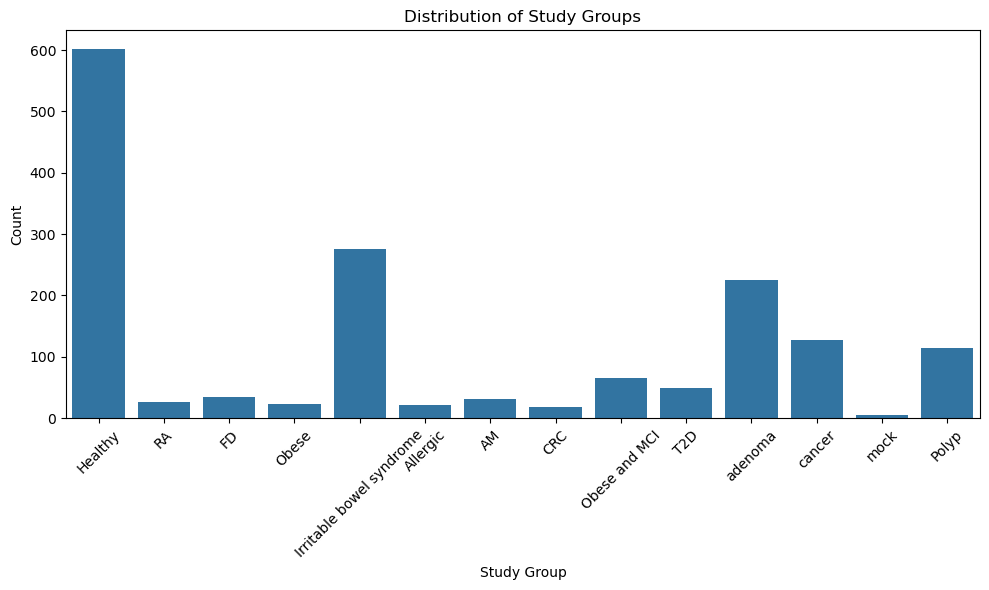

In [62]:

# Fourth cell - Visualize data distribution
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Study.Group')
plt.title('Distribution of Study Groups')
plt.xlabel('Study Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

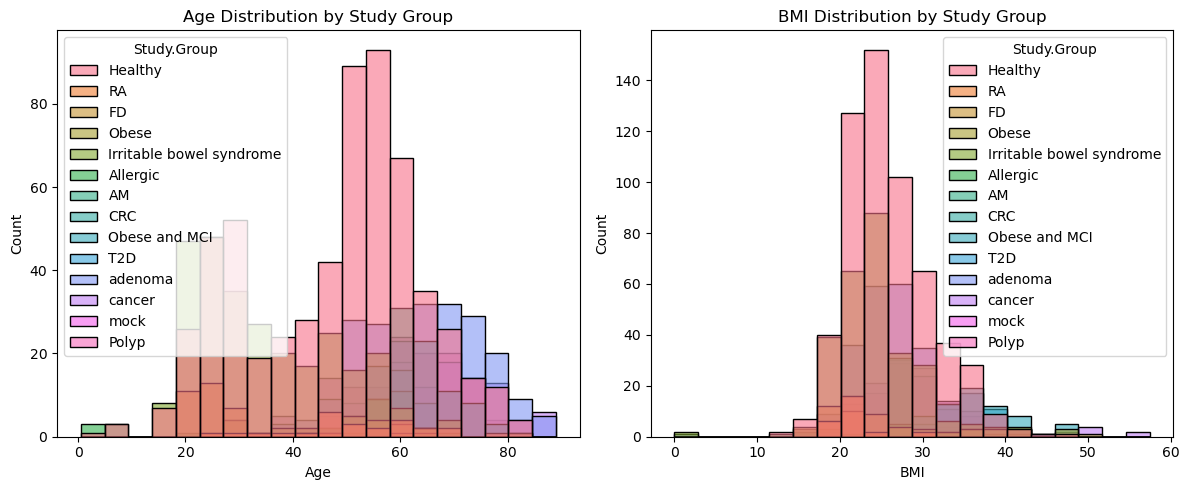

In [63]:

# Visualize numeric features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue='Study.Group', bins=20, alpha=0.6)
plt.title('Age Distribution by Study Group')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='BMI', hue='Study.Group', bins=20, alpha=0.6)
plt.title('BMI Distribution by Study Group')
plt.tight_layout()
plt.show()

In [64]:
numerical_cols = df.select_dtypes(include=np.number).columns
string_cols = df.select_dtypes(include='object').columns

# Create a dictionary for fill values
fill_values = {}
for col in numerical_cols:
    fill_values[col] = 0
for col in string_cols:
    fill_values[col] = ' '

# Fill NaN values using the dictionary
df.fillna(value=fill_values, inplace=True)


In [65]:
df['Study.Group'].value_counts()

Study.Group
Healthy                     602
Irritable bowel syndrome    276
adenoma                     225
cancer                      127
Polyp                       114
Obese and MCI                66
T2D                          49
FD                           35
AM                           31
RA                           26
Obese                        23
Allergic                     22
CRC                          18
mock                          5
                              1
Name: count, dtype: int64

In [66]:
df = df[df['Study.Group'] != 'mock']
df = df[df['Study.Group'] != ' ']

In [67]:
df['Study.Group'].value_counts()

Study.Group
Healthy                     602
Irritable bowel syndrome    276
adenoma                     225
cancer                      127
Polyp                       114
Obese and MCI                66
T2D                          49
FD                           35
AM                           31
RA                           26
Obese                        23
Allergic                     22
CRC                          18
Name: count, dtype: int64

In [79]:
# Fifth cell - Split data into development, validation, and test sets (80-10-10)
def split_data(df, target_col='Study.Group'):
    """
    Split data into development (80%), validation (10%), and test (10%) sets.
    """
    # First split: 80% development, 20% remaining
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    X_dev, X_temp, y_dev, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Second split: divide the remaining 20% into validation (10%) and test (10%)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
    
    print(f"Development set: {X_dev.shape[0]} samples ({X_dev.shape[0]/X.shape[0]:.1%})")
    print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/X.shape[0]:.1%})")
    print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/X.shape[0]:.1%})")
    
    return X_dev, X_val, X_test, y_dev, y_val, y_test

# Split the data
X_dev, X_val, X_test, y_dev, y_val, y_test = split_data(df)

Development set: 1291 samples (80.0%)
Validation set: 161 samples (10.0%)
Test set: 162 samples (10.0%)


In [84]:
# Sixth cell - Create preprocessor
def create_preprocessor():
    """
    Create a column transformer for preprocessing mixed data types.
    """
    # Identify categorical and numerical columns
    categorical_features = ['Sex', 'Country', 'Continent', 'Ethnicity']
    numerical_features = ['Age', 'BMI']
    
    # Create preprocessors for different column types
    numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    # Combine transformers in a column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    return preprocessor

# Create preprocessor and fit on development data
preprocessor = create_preprocessor()
X_dev_processed = preprocessor.fit_transform(X_dev)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

# Encode target variable
le = LabelEncoder()
y_dev_encoded = le.fit_transform(y_dev)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)
print(f"Target classes: {le.classes_}")

Target classes: ['AM' 'Allergic' 'CRC' 'FD' 'Healthy' 'Irritable bowel syndrome' 'Obese'
 'Obese and MCI' 'Polyp' 'RA' 'T2D' 'adenoma' 'cancer']


# Light GBM

In [88]:

# Seventh cell - Train LightGBM model
# Train LightGBM model
print("Training LightGBM model...")
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
lgb_model.fit(
    X_dev_processed, y_dev_encoded,
    eval_set=[(X_val_processed, y_val_encoded)],
    eval_metric='multi_logloss'
)

# Make predictions
lgb_val_pred = lgb_model.predict(X_val_processed)
lgb_val_prob = lgb_model.predict_proba(X_val_processed)

# Evaluate LightGBM
print("\nLightGBM Classification Report:")
print(classification_report(y_val_encoded, lgb_val_pred, target_names=le.classes_))



Training LightGBM model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 1291, number of used features: 19
[LightGBM] [Info] Start training from score -3.944297
[LightGBM] [Info] Start training from score -4.272801
[LightGBM] [Info] Start training from score -4.524115
[LightGBM] [Info] Start training from score -3.830968
[LightGBM] [Info] Start training from score -0.987305
[LightGBM] [Info] Start training from score -1.765010
[LightGBM] [Info] Start training from score -4.272801
[LightGBM] [Info] Start training from score -3.192880
[LightGBM] [Info] Start training from score -2.652313
[LightGBM] [Info] Start training from score -4.118650
[LightGBM] [Info] Start training from score -3.499611
[LightGBM] [Info] Start trai

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# XGBoost

In [93]:
# Eighth cell - Train XGBoost model
# Train XGBoost model
print("Training XGBoost model...")
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb_model.fit(
    X_dev_processed, y_dev_encoded,
    eval_set=[(X_val_processed, y_val_encoded)],
)

# Make predictions
xgb_val_pred = xgb_model.predict(X_val_processed)
xgb_val_prob = xgb_model.predict_proba(X_val_processed)

# Evaluate XGBoost
print("\nXGBoost Classification Report:")
print(classification_report(y_val_encoded, xgb_val_pred, target_names=le.classes_))

Training XGBoost model...
[0]	validation_0-mlogloss:2.29882
[1]	validation_0-mlogloss:2.11513
[2]	validation_0-mlogloss:1.97182
[3]	validation_0-mlogloss:1.85804
[4]	validation_0-mlogloss:1.76261
[5]	validation_0-mlogloss:1.67867
[6]	validation_0-mlogloss:1.60559
[7]	validation_0-mlogloss:1.54502
[8]	validation_0-mlogloss:1.48852
[9]	validation_0-mlogloss:1.43932
[10]	validation_0-mlogloss:1.39356
[11]	validation_0-mlogloss:1.35310
[12]	validation_0-mlogloss:1.31750
[13]	validation_0-mlogloss:1.28481
[14]	validation_0-mlogloss:1.25701
[15]	validation_0-mlogloss:1.22883
[16]	validation_0-mlogloss:1.20569
[17]	validation_0-mlogloss:1.18225
[18]	validation_0-mlogloss:1.16204
[19]	validation_0-mlogloss:1.14300
[20]	validation_0-mlogloss:1.12917
[21]	validation_0-mlogloss:1.11451
[22]	validation_0-mlogloss:1.10074
[23]	validation_0-mlogloss:1.08949
[24]	validation_0-mlogloss:1.07729
[25]	validation_0-mlogloss:1.06678
[26]	validation_0-mlogloss:1.05622
[27]	validation_0-mlogloss:1.04706
[28]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [95]:
# Ninth cell - Train AdaBoost model
# Train AdaBoost model
print("Training AdaBoost model...")
ada_model = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
ada_model.fit(X_dev_processed, y_dev_encoded)

# Make predictions
ada_val_pred = ada_model.predict(X_val_processed)
ada_val_prob = ada_model.predict_proba(X_val_processed)

# Evaluate AdaBoost
print("\nAdaBoost Classification Report:")
print(classification_report(y_val_encoded, ada_val_pred, target_names=le.classes_))



Training AdaBoost model...

AdaBoost Classification Report:
                          precision    recall  f1-score   support

                      AM       0.00      0.00      0.00         3
                Allergic       0.00      0.00      0.00         2
                     CRC       0.00      0.00      0.00         2
                      FD       0.00      0.00      0.00         4
                 Healthy       0.38      1.00      0.55        60
Irritable bowel syndrome       0.50      0.04      0.07        27
                   Obese       0.00      0.00      0.00         3
           Obese and MCI       0.00      0.00      0.00         7
                   Polyp       0.00      0.00      0.00        11
                      RA       0.00      0.00      0.00         3
                     T2D       0.00      0.00      0.00         5
                 adenoma       0.00      0.00      0.00        22
                  cancer       1.00      0.08      0.15        12

              

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Preci

In [97]:
# Tenth cell - Compare models
# Store models and their predictions
models = {
    'LightGBM': lgb_model,
    'XGBoost': xgb_model,
    'AdaBoost': ada_model
}

val_predictions = {
    'LightGBM': lgb_val_pred,
    'XGBoost': xgb_val_pred,
    'AdaBoost': ada_val_pred
}

val_probabilities = {
    'LightGBM': lgb_val_prob,
    'XGBoost': xgb_val_prob,
    'AdaBoost': ada_val_prob
}

# Calculate metrics for all models
def calculate_metrics(y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision_macro = precision_score(y_true, y_pred, average='macro')
    recall_macro = recall_score(y_true, y_pred, average='macro')
    f1_macro = f1_score(y_true, y_pred, average='macro')
    roc_auc = roc_auc_score(y_true, y_prob, multi_class='ovr')
    
    return {
        'accuracy': accuracy,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'f1_macro': f1_macro,
        'roc_auc': roc_auc
    }

# Collect metrics for all models
metrics = {}
for model_name, y_pred in val_predictions.items():
    metrics[model_name] = calculate_metrics(y_val_encoded, y_pred, val_probabilities[model_name])

# Create comparison dataframe
model_comparison = pd.DataFrame({
    model_name: {
        metric: value for metric, value in model_metrics.items()
    } for model_name, model_metrics in metrics.items()
}).T

# Display comparison
print("Model Comparison on Validation Set:")
model_comparison

Model Comparison on Validation Set:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,accuracy,precision_macro,recall_macro,f1_macro,roc_auc
LightGBM,0.664596,0.638402,0.640443,0.637112,0.941217
XGBoost,0.677019,0.722993,0.745234,0.720149,0.931953
AdaBoost,0.385093,0.144596,0.086182,0.059482,0.852532


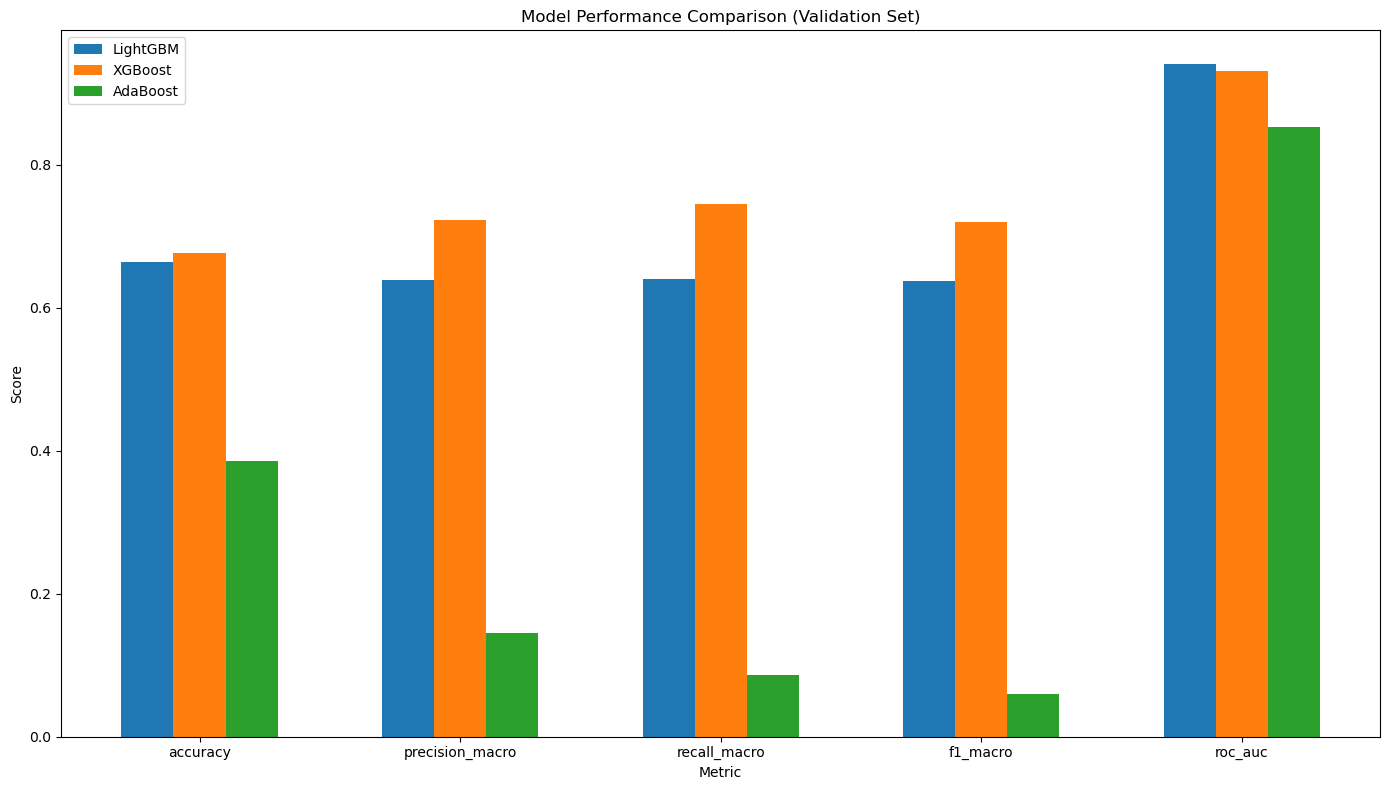

In [99]:
# Eleventh cell - Visualize model comparison
# Visualize model comparison
metrics_to_plot = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']
plt.figure(figsize=(14, 8))

# Create bar chart
bar_width = 0.2
x = np.arange(len(metrics_to_plot))

for i, (model_name, model_metrics) in enumerate(metrics.items()):
    plt.bar(x + i*bar_width, 
            [model_metrics[metric] for metric in metrics_to_plot], 
            width=bar_width, 
            label=model_name)

plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Model Performance Comparison (Validation Set)')
plt.xticks(x + bar_width, metrics_to_plot)
plt.legend()
plt.tight_layout()
plt.show()

In [101]:

# Twelfth cell - Select best model and evaluate on test set
# Select best model based on F1 score
best_model_name = model_comparison['f1_macro'].idxmax()
best_model = models[best_model_name]
print(f"Best model based on F1 score: {best_model_name}")

# Make predictions on test set
test_pred = best_model.predict(X_test_processed)
test_prob = best_model.predict_proba(X_test_processed)

# Calculate metrics on test set
test_metrics = calculate_metrics(y_test_encoded, test_pred, test_prob)

# Display test metrics
print(f"\n{best_model_name} Test Set Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Display classification report
print(f"\n{best_model_name} Test Set Classification Report:")
print(classification_report(y_test_encoded, test_pred, target_names=le.classes_))

Best model based on F1 score: XGBoost

XGBoost Test Set Metrics:
accuracy: 0.6543
precision_macro: 0.7287
recall_macro: 0.6918
f1_macro: 0.6953
roc_auc: 0.9117

XGBoost Test Set Classification Report:
                          precision    recall  f1-score   support

                      AM       1.00      1.00      1.00         3
                Allergic       1.00      0.50      0.67         2
                     CRC       1.00      1.00      1.00         2
                      FD       1.00      1.00      1.00         3
                 Healthy       0.61      0.75      0.68        61
Irritable bowel syndrome       0.75      0.64      0.69        28
                   Obese       0.00      0.00      0.00         2
           Obese and MCI       1.00      1.00      1.00         6
                   Polyp       0.57      0.33      0.42        12
                      RA       0.67      1.00      0.80         2
                     T2D       1.00      1.00      1.00         5
      

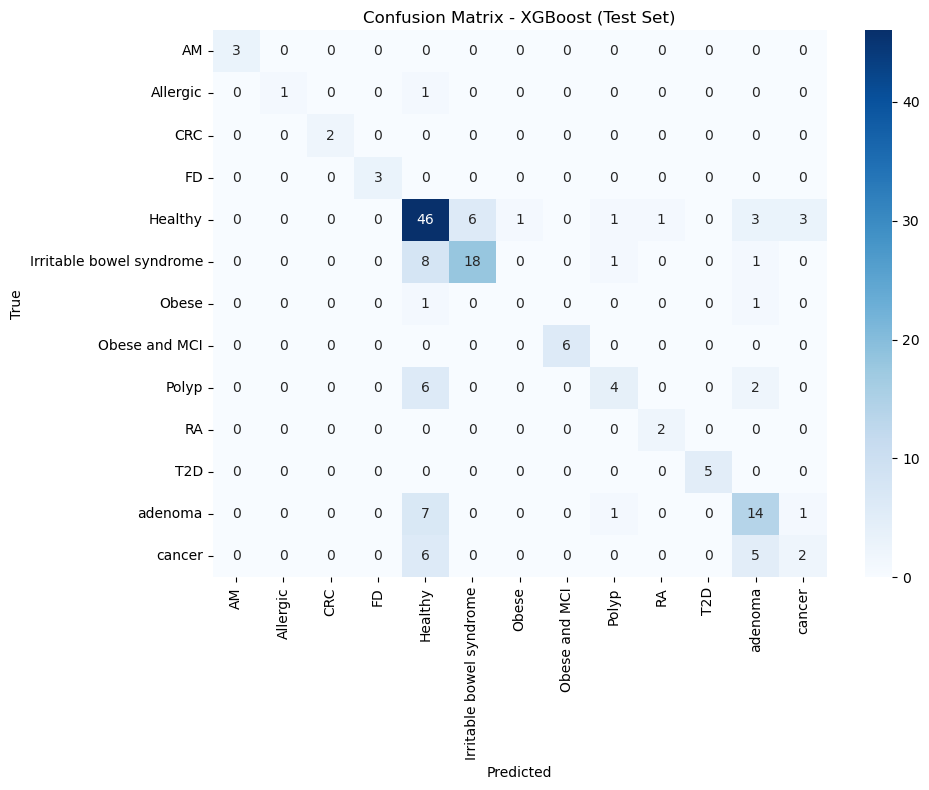

In [103]:



# Thirteenth cell - Create confusion matrix for best model
# Create confusion matrix
cm = confusion_matrix(y_test_encoded, test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=le.classes_,
           yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - {best_model_name} (Test Set)')
plt.tight_layout()
plt.show()

In [107]:


# Fourteenth cell - Analyze feature importance for best model
# Extract feature names
def get_feature_names(preprocessor):
    # Get numerical feature names
    numerical_features = ['Age', 'BMI']
    
    # Get categorical feature names with one-hot encoding
    categorical_features = ['Sex', 'Country', 'Continent', 'Ethnicity']
    onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
    
    # Combine all feature names
    feature_names = numerical_features.copy()
    feature_names.extend(cat_feature_names)
    
    return feature_names

# Check if the best model supports feature importance
if best_model_name in ['LightGBM', 'XGBoost']:
    # Get feature names
    feature_names = get_feature_names(preprocessor)
    
    # Get feature importance
    importances = best_model.feature_importances_
    
    # Create dataframe for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    # Sort by importance
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
    
    # Display top features
    print(f"Top 15 Important Features - {best_model_name}:")
    print(feature_importance_df.head(15))
else:
    print(f"Feature importance visualization not implemented for {best_model_name}")


Top 15 Important Features - XGBoost:
                       Feature  Importance
5               Country_Canada    0.231453
8                Country_Italy    0.150623
13                 Ethnicity_     0.122840
2                        Sex_     0.076542
7                Country_India    0.076035
6                Country_China    0.065874
9                  Country_USA    0.045216
14  Ethnicity_African American    0.037128
16         Ethnicity_Caucasian    0.036258
4                        Sex_M    0.029178
10              Continent_Asia    0.027232
15             Ethnicity_Asian    0.021066
3                        Sex_F    0.018119
0                          Age    0.016218
1                          BMI    0.013297


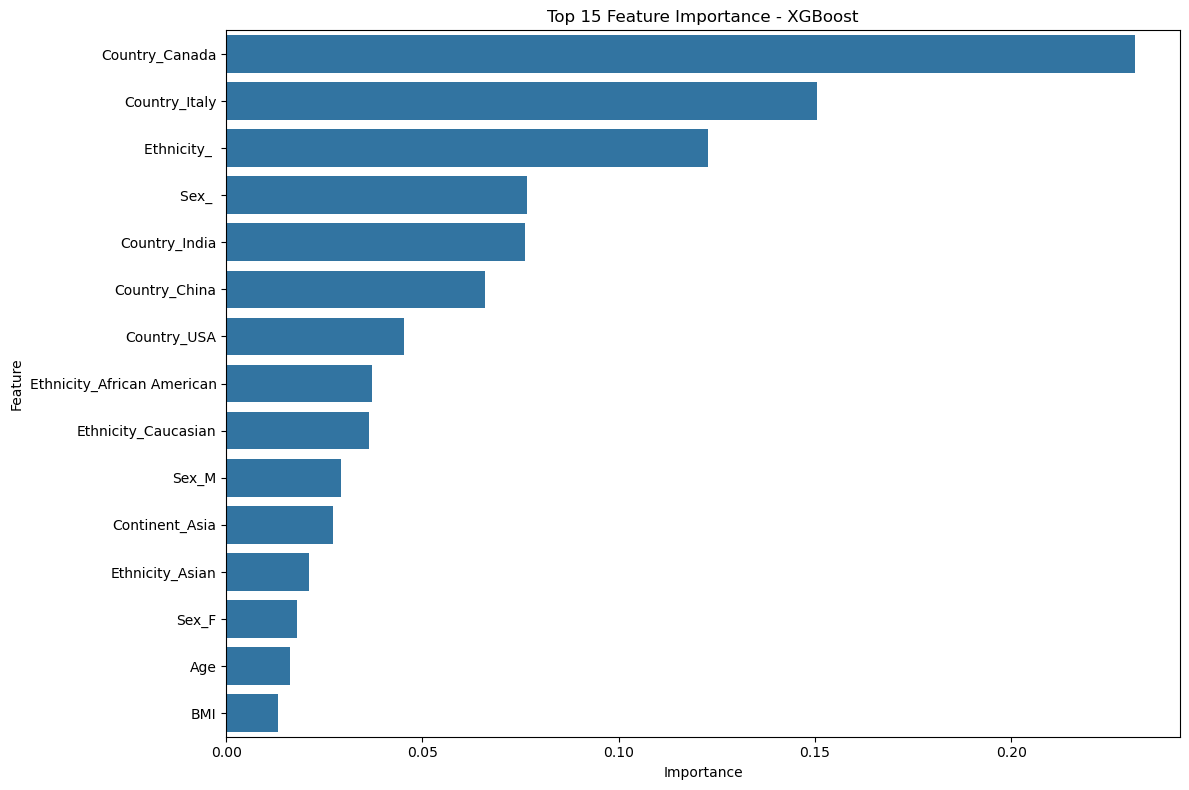

In [109]:
# Fifteenth cell - Visualize feature importance
if best_model_name in ['LightGBM', 'XGBoost']:
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    sns.barplot(x='Importance', y='Feature', data=top_features)
    plt.title(f'Top 15 Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()


In [111]:

# Sixteenth cell - Compare performance across datasets
# Calculate metrics on development set
dev_pred = best_model.predict(X_dev_processed)
dev_prob = best_model.predict_proba(X_dev_processed)
dev_metrics = calculate_metrics(y_dev_encoded, dev_pred, dev_prob)

# Create performance comparison dataframe
performance_comparison = pd.DataFrame({
    'Development': dev_metrics,
    'Validation': metrics[best_model_name],
    'Test': test_metrics
})

# Display performance comparison
print(f"Performance Comparison for {best_model_name} Across Datasets:")
performance_comparison

Performance Comparison for XGBoost Across Datasets:


,Development,Validation,Test
accuracy,0.845081,0.677019,0.654321
precision_macro,0.932271,0.722993,0.728709
recall_macro,0.874681,0.745234,0.691756
f1_macro,0.898539,0.720149,0.695266
roc_auc,0.990842,0.931953,0.911725


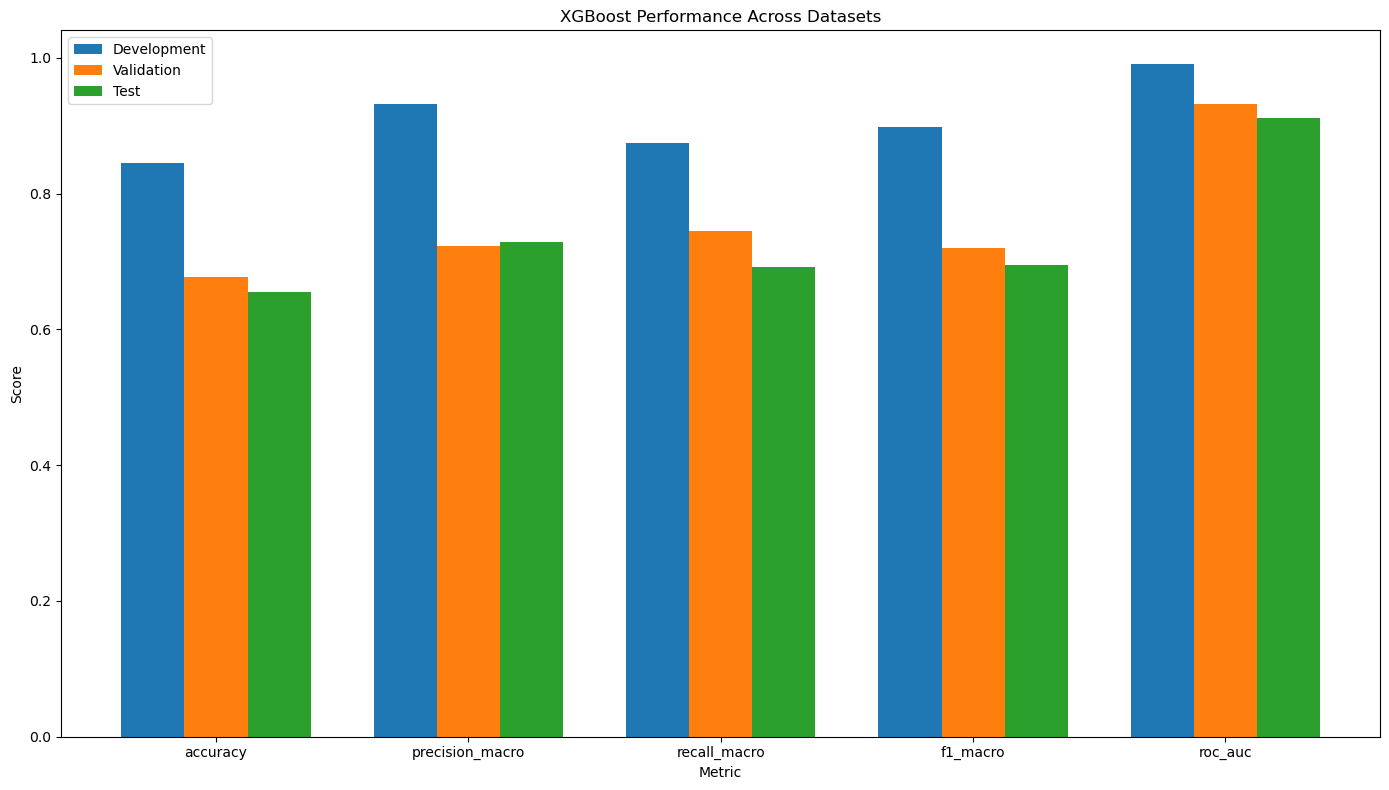

In [113]:


# Seventeenth cell - Visualize performance across datasets
# Visualize performance across datasets
plt.figure(figsize=(14, 8))

# Create bar chart
bar_width = 0.25
x = np.arange(len(metrics_to_plot))

for i, (dataset_name, dataset_metrics) in enumerate(performance_comparison.items()):
    plt.bar(x + i*bar_width, 
            [dataset_metrics[metric] for metric in metrics_to_plot], 
            width=bar_width, 
            label=dataset_name)

plt.xlabel('Metric')
plt.ylabel('Score')
plt.title(f'{best_model_name} Performance Across Datasets')
plt.xticks(x + bar_width, metrics_to_plot)
plt.legend()
plt.tight_layout()
plt.show()
